### Importing Libraries and Loading Dataset

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
df=pd.read_csv('/content/StudentsPerformance.csv')
pd.set_option("display.max_columns",None)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### General information about Dataset

In [26]:
df.info()  # General information about data and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Total Rows : 1000

Total Column: 8

All columns datatypes are correct

#### Missing Values

In [27]:
df.isnull().sum()  # Checking missing value

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


No missing values found

### Duplicates

In [28]:
df.duplicated().sum()

np.int64(0)

No missing duplicates found

#### Individual Columns Value Check to detect data inconsistencies

In [29]:
df['gender'].unique()  # Checking individual column unique values

array(['female', 'male'], dtype=object)

In [30]:
df['race/ethnicity'].unique()  # Checking individual unique repeated values

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [31]:
df['parental level of education'].unique()  # Checking individual column unique values

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [32]:
df['lunch'].unique()  # Checking individual column unique values

array(['standard', 'free/reduced'], dtype=object)

In [33]:
df['test preparation course'].unique() # Checking individual column unique values

array(['none', 'completed'], dtype=object)

In [34]:
df['math score'].unique() # Checking individual column unique values

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [35]:
df['reading score'].unique() # Checking individual column unique values

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40])

In [36]:
df['writing score'].unique() # Checking individual column unique values

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23])

No data inconsistencies were founs

**Summary of Columns**

**Nominal Categorical Columns - 5**

'gender',  'race/ethnicity',  'parental level of education',
'lunch', 'test preparation course'

**Continious Numeric Columns -3**

'math score',  'reading score', 'writing score'

### Outliers

In [37]:
def detect_outliers_iqr(data, column_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\n Column :{column_name}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outlier Values with Counts:")
    print(outliers.value_counts().sort_index())  # Count and sort outlier values
    print(f"min: {lower_bound}, max:{upper_bound}")
    return outliers

# List of columns to check for outliers (Continious numeric columns)
continious_numeric_col = ['math score', 'reading score', 'writing score']
# Loop through the columns and detect outliers
for col in continious_numeric_col:
    outliers = detect_outliers_iqr(df[col], col)


 Column :math score
Number of Outliers: 8
Outlier Values with Counts:
math score
0     1
8     1
18    1
19    1
22    1
23    1
24    1
26    1
Name: count, dtype: int64
min: 27.0, max:107.0

 Column :reading score
Number of Outliers: 6
Outlier Values with Counts:
reading score
17    1
23    1
24    2
26    1
28    1
Name: count, dtype: int64
min: 29.0, max:109.0

 Column :writing score
Number of Outliers: 5
Outlier Values with Counts:
writing score
10    1
15    1
19    1
22    1
23    1
Name: count, dtype: int64
min: 25.875, max:110.875


In [38]:
# Create a boolean mask to identify outlier rows
outlier_mask = pd.Series([False] * len(df), index=df.index)

for col in continious_numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier rows for the current column
    column_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

    # Update the outlier_mask: if a row is an outlier in ANY of the specified columns, mark it as True
    outlier_mask[column_outliers] = True

# Invert the mask to get rows that are NOT outliers
non_outlier_mask = ~outlier_mask

# Filter the DataFrame to keep only non-outlier rows
df_filtered = df[non_outlier_mask].copy()

# Reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outlier rows: {df_filtered.shape}")



Original DataFrame shape: (1000, 8)
DataFrame shape after removing outlier rows: (988, 8)


In [39]:
# Update the original DataFrame reference if you want to work with the filtered data
df = df_filtered
df.shape

(988, 8)

### Visualization: Histogram, Box Plot, Count Plot, Heatmap

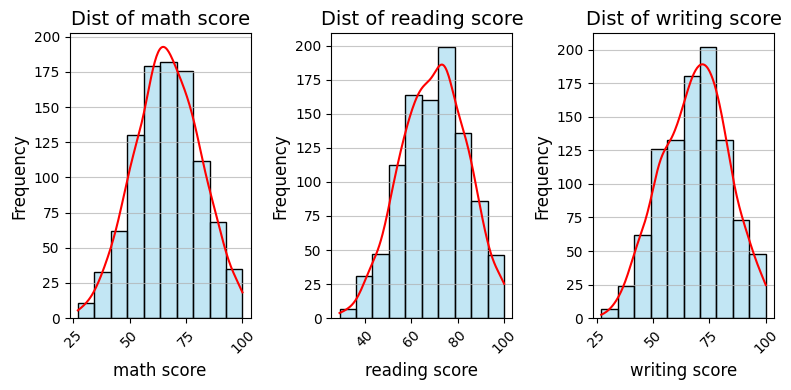

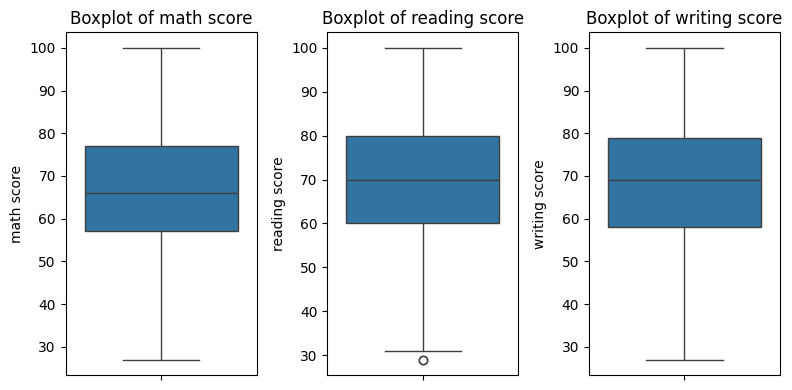

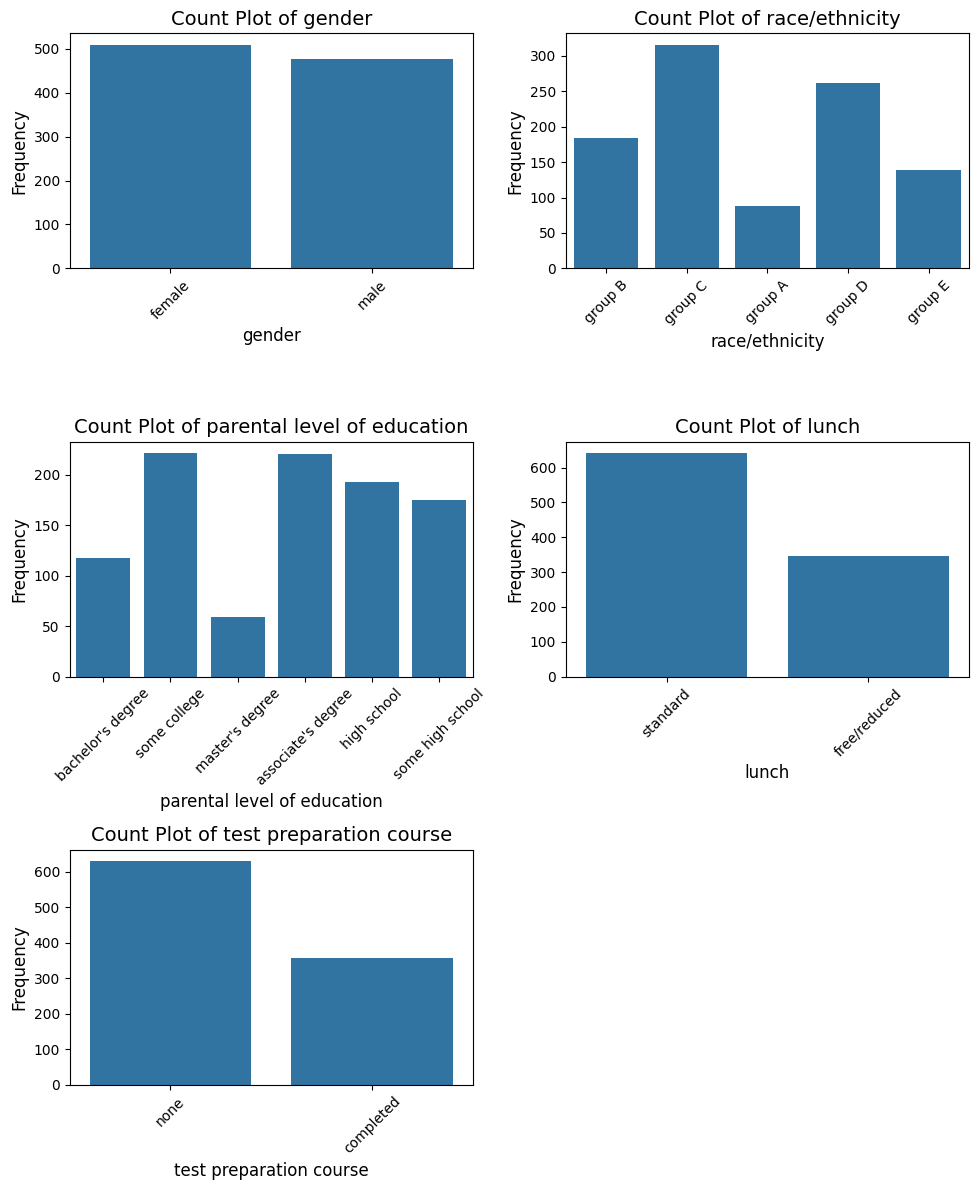

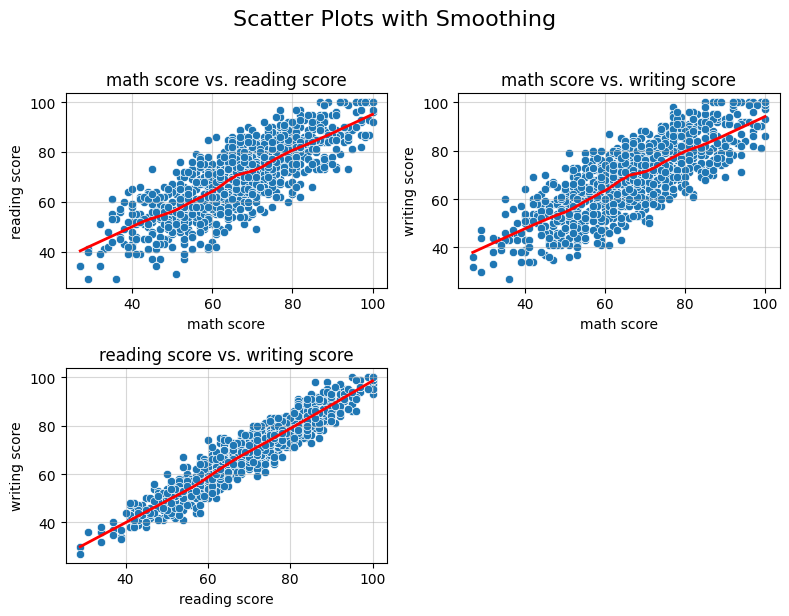

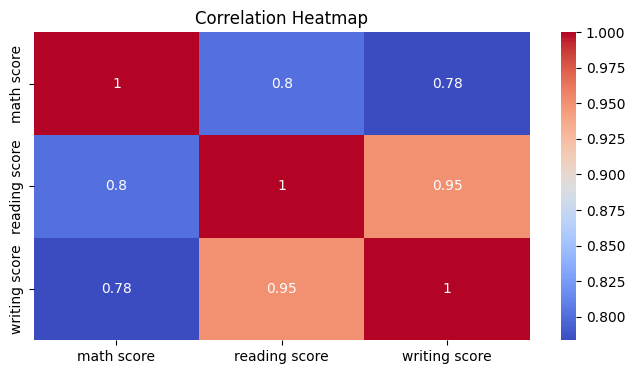

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.api as sm
import itertools

continious_numeric_col = ['math score', 'reading score', 'writing score']

categorical_col = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

#------------------------------------------------------------------------------------------------------------

# Histogram

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 4))  # 1 rows, 2 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create histograms with KDE
for i, column in enumerate(continious_numeric_col):
    ax = axes[i]  # Get the current subplot

    # Plot histogram with KDE
    sns.histplot(df[column].dropna(), kde=True, bins=10, color='skyblue', edgecolor='black', ax=ax)

    # Access the KDE line and change its color
    kde_line = ax.lines[0]
    kde_line.set_color('red')

    # Formatting and labeling
    ax.set_title(f'Dist of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#--------------------------------------------------------------------------------------

# Box Plot

plt.figure(figsize=(8, 4))
for i, col in enumerate(continious_numeric_col):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#---------------------------------------------------------------------------------------

#Count Plot

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))  # 2 rows, 3 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, column in enumerate(categorical_col):
    ax = axes[i]  # Get the current subplot
    sns.countplot(x=column, data=df, ax=ax)  # Create the count plot

    # Formatting and labeling
    ax.set_title(f'Count Plot of {column}', fontsize=14)  # Set title
    ax.set_xlabel(column, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Remove the empty subplot (if any)
if len(categorical_col) < len(axes):
    fig.delaxes(axes[-1])  # Remove the last subplot if it's empty

# Show the plot
plt.show()

#-----------------------------------------------------------------------------------------------------------

# Scatter Plots with Smoothing:

# Generate all unique pairs of columns for scatter plots
column_pairs = list(itertools.combinations(continious_numeric_col, 2))

# Create a figure and axes for the subplots
num_plots = len(column_pairs)
num_cols = 2  #  adjust this for desired layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows based on columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
fig.suptitle('Scatter Plots with Smoothing', fontsize=16, y=1.02)
axes = axes.flatten()

for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i]
    sns.scatterplot(x=df[col1], y=df[col2], ax=ax)

    # Add smoothing using LOESS (lowess) from statsmodels
    lowess = sm.nonparametric.lowess(df[col2], df[col1], frac=0.3)  # Adjust 'frac' for smoothness
    ax.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2)

    ax.set_title(f'{col1} vs. {col2}', fontsize=12)
    ax.set_xlabel(col1, fontsize=10)
    ax.set_ylabel(col2, fontsize=10)
    ax.grid(True, alpha=0.5)

# Remove any empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------

# Heatmap

# correlation  between any two variables'coolwarm'
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


*   Reading score and writing score are highly correlated
*   Reading score and math score are highly correlated
*   Writing score and math score are highly correlated






Plotting Histogram to check Distribution of Continious Numerical Columns

One Hot Encoding

In [41]:
# Select the categorical columns for encoding
categorical_cols_onehot = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Apply one-hot encoding to the selected columns
df = pd.get_dummies(df, columns=categorical_cols_onehot)

# Display the first few rows of the new DataFrame with encoded columns
pd.set_option("display.max_columns",None)
df.head(3)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True


In [23]:
df.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      988 non-null    int64
 1   reading score                                   988 non-null    int64
 2   writing score                                   988 non-null    int64
 3   gender_female                                   988 non-null    bool 
 4   gender_male                                     988 non-null    bool 
 5   race/ethnicity_group A                          988 non-null    bool 
 6   race/ethnicity_group B                          988 non-null    bool 
 7   race/ethnicity_group C                          988 non-null    bool 
 8   race/ethnicity_group D                          988 non-null    bool 
 9   race/ethnicity_group E                          988 non-null    b

In [45]:
y= df['math score'] # dependent variable that we want to predict

### Feature Selection

It is an itertive process. After scaling Lasso was used to return number of column to keep and then OSL was used (where p value is greater than 0.05 that column was also removed)

So after Lasso and OSL we will remove following column inorder to get more accurate results

**Why This Combination Can Be Powerful:**

**Lasso's Strength:** Lasso is effective at handling multicollinearity (high correlation between features) and can automatically eliminate redundant features.

**OLS's Strength:** OLS provides statistical significance testing through p-values, giving you more confidence in the chosen features and understanding their individual contributions to the model.

In [64]:
columns_to_drop= ['math score', 'race/ethnicity_group A','race/ethnicity_group D',"parental level of education_associate's degree",
  'parental level of education_high school','parental level of education_some college',
  'parental level of education_some high school','lunch_standard','race/ethnicity_group C','gender_male' ]

In [65]:
X = df.drop(columns=columns_to_drop, axis=1)
X.head(3)

,reading score,writing score,gender_female,race/ethnicity_group B,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_master's degree,lunch_free/reduced,test preparation course_completed,test preparation course_none
0,72,74,True,True,False,True,False,False,False,True
1,90,88,True,False,False,False,False,False,True,False
2,95,93,True,True,False,False,True,False,False,True


In [66]:
X.shape

(988, 10)

#### Split Data

In [67]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=700)
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((790, 10), (198, 10), (790,), (198,))

### Linear Regression

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Linear Regression model on scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.8384
Adjusted R² Score: 0.8297
Mean Squared Error (MSE): 29.0632
Root Mean Squared Error (RMSE): 5.3910
Mean Absolute Error (MAE): 4.2892


### R-Square after Hyper parameter tunning

In [72]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

model = Ridge()  # or Lasso(), ElasticNet()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)
print("Best R²:", grid.best_score_)

Best R²: 0.861584055048124


### Conclusion

After hyper parameter tunnning we were able to increase R-Squared from 0.83 to 0.86

### Visualization

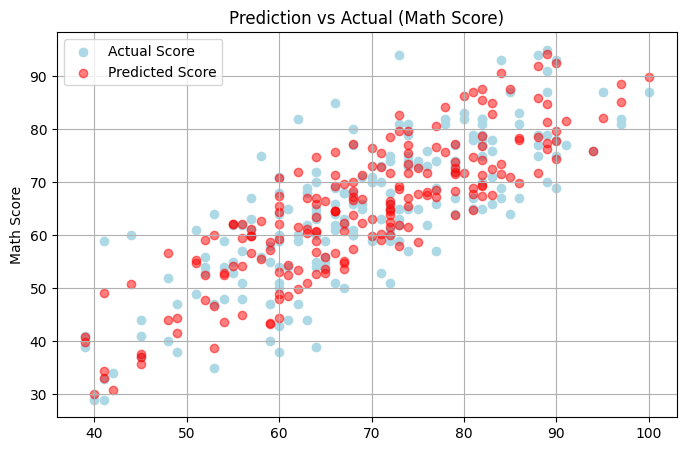

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='lightblue', label='Actual Score')
plt.scatter(X_plot, y_pred, color='red', alpha=0.5, label='Predicted Score')
plt.ylabel('Math Score')
plt.title('Prediction vs Actual (Math Score)')
plt.legend()
plt.grid(True)
plt.show()

### Poly degree 2

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Assuming X and y are already defined from your previous steps

# Generate Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split Your Data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, train_size=0.8, random_state=700)

# Scale Data (Apply after polynomial transformation)
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Train a Linear Regression Model on the transformed and scaled data
model_poly = LinearRegression()
model_poly.fit(X_train_poly_scaled, y_train)

# Make Predictions
y_pred_poly = model_poly.predict(X_test_poly_scaled)

# Evaluate the Model
r2_poly = r2_score(y_test, y_pred_poly)
print(f"\nPolynomial Regression (Degree 2) R-squared Score: {r2_poly:.4f}")

n = X_test_poly.shape[0]     # number of samples
p = X_test_poly.shape[1]     # number of predictors
adjusted_r2_poly = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"\nPolynomial Regression (Degree 2)adjusted R-squared Score: {adjusted_r2_poly:.4f}")

#  other metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print(f"\nPolynomial Regression (Degree 2) MSE: {mse_poly:.4f}")
print(f"\nRoot Mean Squared Error (RMSE)-Degree 2: {rmse_poly:.4f}")
print(f"\nPolynomial Regression (Degree 2) MAE: {mae_poly:.4f}")


Polynomial Regression (Degree 2) R-squared Score: 0.8246

Polynomial Regression (Degree 2)adjusted R-squared Score: 0.7588

Polynomial Regression (Degree 2) MSE: 31.5493

Root Mean Squared Error (RMSE)-Degree 2: 5.6169

Polynomial Regression (Degree 2) MAE: 4.5224


### Poly Degree 3

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Generate Polynomial Features (Degree 3)
poly_degree_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_degree_3 = poly_degree_3.fit_transform(X)

# Split Data
X_train_poly_degree_3, X_test_poly_degree_3, y_train, y_test = train_test_split(X_poly_degree_3, y, train_size=0.8, random_state=700)

# Scale Data
scaler_poly_degree_3 = StandardScaler()
X_train_poly_degree_3_scaled = scaler_poly_degree_3.fit_transform(X_train_poly_degree_3)
X_test_poly_degree_3_scaled = scaler_poly_degree_3.transform(X_test_poly_degree_3)

# Train a Linear Regression Model
model_poly_degree_3 = LinearRegression()
model_poly_degree_3.fit(X_train_poly_degree_3_scaled, y_train)

# Make Predictions
y_pred_poly_degree_3 = model_poly_degree_3.predict(X_test_poly_degree_3_scaled)

# Evaluate the Model
r2_poly_degree_3 = r2_score(y_test, y_pred_poly_degree_3)
print(f"\nPolynomial Regression (Degree 3) R-squared Score: {r2_poly_degree_3:.4f}")

n1 = X_test_poly_degree_3.shape[0]     # number of samples
p1 = X_test_poly_degree_3.shape[1]     # number of predictors
print("n1:",n1)
print("p1",p1)

adjusted_r2_poly_degree_3 = (1 - (1 - r2_poly_degree_3) * (n1 - 1) / (n1 - p1 - 1))
print(f"\nPolynomial Regression (Degree 3)adjusted R-squared Score: {adjusted_r2_poly_degree_3:.4f}")

# You can also check other metrics
mse_poly_degree_3 = mean_squared_error(y_test, y_pred_poly_degree_3)
mae_poly_degree_3 = mean_absolute_error(y_test, y_pred_poly_degree_3)
rmse_poly_degree_3 = np.sqrt(mse_poly_degree_3)
print(f"\nPolynomial Regression (Degree 3) MSE: {mse_poly_degree_3:.4f}")
print(f"\nRoot Mean Squared Error (RMSE)-Degree 3: {rmse_poly_degree_3:.4f}")
print(f"\nPolynomial Regression (Degree 3) MAE: {mae_poly_degree_3:.4f}")


Polynomial Regression (Degree 3) R-squared Score: 0.7947
n1: 198
p1 285

Polynomial Regression (Degree 3)adjusted R-squared Score: 1.4595

Polynomial Regression (Degree 3) MSE: 36.9150

Root Mean Squared Error (RMSE)-Degree 3: 6.0758

Polynomial Regression (Degree 3) MAE: 4.7918


# Summary

The fact that the formula breaks down in this manner mathematically signals that the model is **trying to estimate too many parameters (coefficients) based on too few data points**. This is the definition of being prone to overfitting.

**No Degrees of Freedom:** When the number of parameters (p) is close to or greater than the number of data points (n), the model has very few or no "degrees of freedom" left to generalize. It can essentially "connect the dots" on the training data perfectly or near-perfectly.


The Adjusted R-squared value of 1.45 is a symptom, not the core problem. The root cause is that the number of features created by the degree 3 polynomial transformation (p1=285) is too large compared to the number of data points (n1=198). This invalidates the Adjusted R-squared calculation and strongly suggests that your polynomial regression model with degree 3 is likely severely overfitting the data.

Recommendations:

**Reduce Polynomial Degree:** A degree of 3 is often too high unless you have a very large dataset and a strong theoretical reason for such complex interactions. Try a lower degree (like 2 or even 1, which is standard linear regression) to significantly reduce the number of features.

**Feature Selection:** Even with a lower degree, we might still have too many features. Consider using feature selection techniques (like Lasso, as you explored earlier) after polynomial transformation to identify and keep only the most important features.

**More Data**: The best long-term solution for complex models is often to acquire more data if possible.

**Regularization:** Techniques like Ridge or Lasso regression (which you also explored) can help mitigate overfitting by penalizing large coefficients, even with a high number of features.